In [128]:
from collections import Counter

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from qgrid import show_grid as exl
from scipy.sparse import csr_matrix, hstack
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from tqdm import tqdm
from yellowbrick.cluster import KElbowVisualizer

In [2]:
np.random.seed(457)

In [3]:
df = pd.read_csv("data.csv")[:20000]

In [4]:
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920


In [5]:
df.tail()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
19995,0.007210,"['Lange', 'Andy Moor', 'Stadium4']",0.439,203612,0.937,0,2Cu7GOgViPVDx9QmhWOrIm,0.895000,11,0.3300,-10.203,0,Hybrid Origin (Year in Review 2020),0,2021-01-22,0.0447,131.992,0.0709,2021
19996,0.234000,['Bad Bunny'],0.811,130014,0.637,1,5RubKOuDoPn5Kj5TLVxSxY,0.000572,10,0.1180,-4.835,0,TE MUDASTE,90,2020-11-27,0.0591,92.025,0.4710,2020
19997,0.003790,['Above & Beyond'],0.646,206748,0.792,0,4WxGMzTRECd5KMfPUPUAjZ,0.547000,7,0.2390,-8.355,1,Blue Monday (Year in Review 2020),0,2021-01-22,0.0358,130.012,0.4270,2021
19998,0.131000,['Shawn Mendes'],0.333,172693,0.637,0,5KCbr5ndeby4y4ggthdiAb,0.000018,1,0.1490,-4.904,0,Wonder,87,2020-10-02,0.0581,139.898,0.1320,2020
19999,0.000043,['Orkidea'],0.484,181054,0.840,0,7LnpZdVhT9QBlrLqKoW7Ep,0.497000,7,0.0974,-8.701,0,That Feeling (Year in Review 2020),1,2021-01-22,0.0359,130.003,0.0354,2021


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      20000 non-null  float64
 1   artists           20000 non-null  object 
 2   danceability      20000 non-null  float64
 3   duration_ms       20000 non-null  int64  
 4   energy            20000 non-null  float64
 5   explicit          20000 non-null  int64  
 6   id                20000 non-null  object 
 7   instrumentalness  20000 non-null  float64
 8   key               20000 non-null  int64  
 9   liveness          20000 non-null  float64
 10  loudness          20000 non-null  float64
 11  mode              20000 non-null  int64  
 12  name              20000 non-null  object 
 13  popularity        20000 non-null  int64  
 14  release_date      20000 non-null  object 
 15  speechiness       20000 non-null  float64
 16  tempo             20000 non-null  float6

In [7]:
df.isna().sum()

acousticness        0
artists             0
danceability        0
duration_ms         0
energy              0
explicit            0
id                  0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
name                0
popularity          0
release_date        0
speechiness         0
tempo               0
valence             0
year                0
dtype: int64

- **No Null Values**

In [8]:
# Duration in minutes
df.duration_ms = (df.duration_ms/1000)/60

# All Variables
https://developer.spotify.com/documentation/web-api/reference/#objects-index

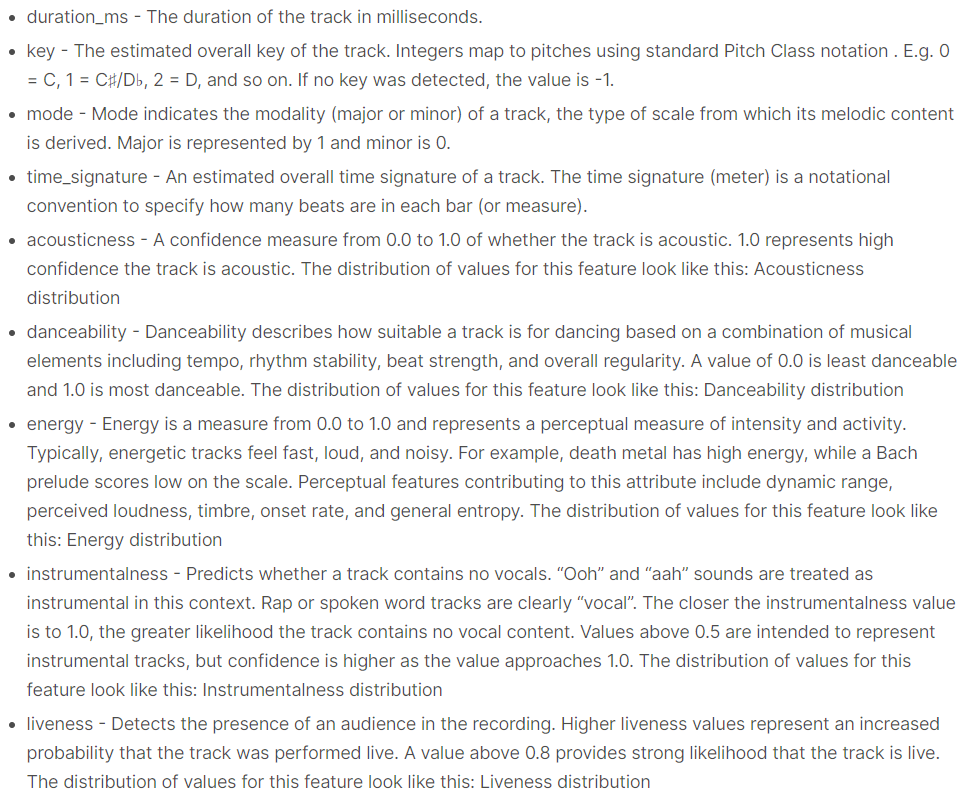

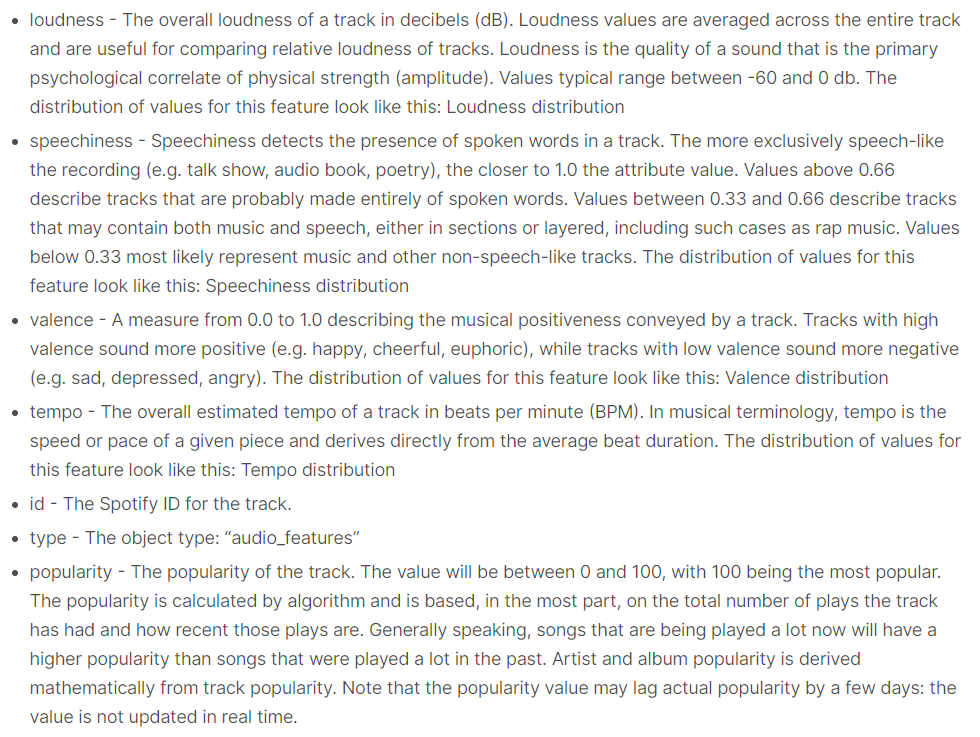

In [9]:
# Dropping released_date as we have year
df.drop('release_date', inplace=True, axis=1)

# Acousticness 
A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

**Acoustic** - Acoustic is when there is minimum instrumental setup and distortion with no tricks and effects and usually with a simple acoustic guitar <br>(not necessarily).

In [10]:
df.acousticness.head()

0    0.991000
1    0.643000
2    0.993000
3    0.000173
4    0.295000
Name: acousticness, dtype: float64

In [11]:
ac = df[['acousticness', 'artists']]

In [12]:
ac[ac.duplicated(subset=['artists'], keep='first')].sort_values(by='acousticness', ascending=False)

,acousticness,artists
1034,0.996000,['Francisco Canaro']
388,0.996000,['Ignacio Corsini']
764,0.996000,['Francisco Canaro']
762,0.996000,['Francisco Canaro']
758,0.996000,['Ignacio Corsini']
...,...,...
17083,0.000003,['Year 200X']
16905,0.000003,['Year 200X']
17295,0.000003,['Year 200X']
17483,0.000003,['Year 200X']


In [13]:
km = KMeans(n_clusters=5)

km = km.fit(ac.acousticness.to_numpy().reshape(-1, 1))
# km = km.fit_transform(ac.acousticness.to_numpy().reshape(-1, 1))

In [14]:
km

KMeans(n_clusters=5)

In [15]:
set(km.labels_)

{0, 1, 2, 3, 4}

In [16]:
# https://scikit-learn-general.narkive.com/2113zSYN/interpreting-the-cluster-centers-in-sklearn-kmeans
km.cluster_centers_

array([[0.04086081],
       [0.95411259],
       [0.25436422],
       [0.50425868],
       [0.75482704]])

In [17]:
km.predict([[0.991000]])

array([1])

In [18]:
ac['cluster'] = pd.Series(km.labels_)

<ipython-input-18-42f33e1ffdb8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac['cluster'] = pd.Series(km.labels_)


In [19]:
ac.head()

,acousticness,artists,cluster
0,0.991000,['Mamie Smith'],1
1,0.643000,"[""Screamin' Jay Hawkins""]",4
2,0.993000,['Mamie Smith'],1
3,0.000173,['Oscar Velazquez'],0
4,0.295000,['Mixe'],2


In [20]:
ac.loc[ac.cluster==0].acousticness.max()

0.147

In [21]:
d = {
    'cluster':[],
    'min':[],
    'max':[],
}

for i in range(5):
    d['cluster'].append(i)
    d['max'].append(ac.loc[ac.cluster==i].acousticness.max())
    d['min'].append(ac.loc[ac.cluster==i].acousticness.min())

In [22]:
pd.DataFrame(d).set_index('cluster').sort_values(by='max')

,min,max
cluster,,
0,0.000,0.147
2,0.148,0.379
3,0.380,0.629
4,0.630,0.854
1,0.855,0.996


In [23]:
d = {
    'cluster':[],
    'intertia':[]
}
for i in tqdm(range(1,10)):
    km = KMeans(n_clusters=i)
    km = km.fit(ac.acousticness.to_numpy().reshape(-1, 1))
    d['cluster'].append(i)
    d['intertia'].append(km.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:02<00:00,  4.02it/s]


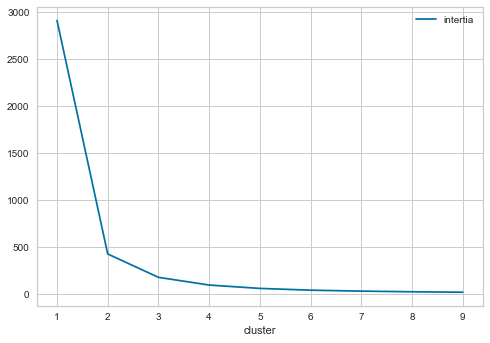

In [24]:
pd.DataFrame(d).plot.line(x='cluster', y='intertia')

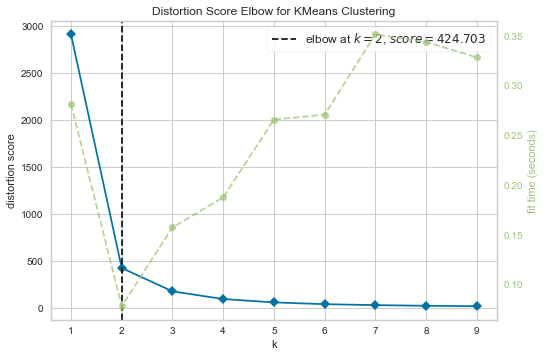

In [25]:
# Using Yellowbrick Visualizer

km = KMeans()
visualizer = KElbowVisualizer(km, k=(1, 10))
visualizer.fit(ac.acousticness.to_numpy().reshape(-1, 1))
visualizer.show()

In [26]:
km = KMeans(n_clusters=2)

km = km.fit(ac.acousticness.to_numpy().reshape(-1, 1))
# km = km.fit_transform(ac.acousticness.to_numpy().reshape(-1, 1))

ac['cluster'] = pd.Series(km.labels_)

ac.head()

<ipython-input-26-594099fbba0c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ac['cluster'] = pd.Series(km.labels_)


,acousticness,artists,cluster
0,0.991000,['Mamie Smith'],0
1,0.643000,"[""Screamin' Jay Hawkins""]",0
2,0.993000,['Mamie Smith'],0
3,0.000173,['Oscar Velazquez'],1
4,0.295000,['Mixe'],1


In [27]:
d = {
    'cluster':[],
    'min':[],
    'max':[],
}

for i in range(2):
    d['cluster'].append(i)
    d['max'].append(ac.loc[ac.cluster==i].acousticness.max())
    d['min'].append(ac.loc[ac.cluster==i].acousticness.min())

pd.DataFrame(d).set_index('cluster').sort_values(by='max')

,min,max
cluster,,
1,0.000,0.501
0,0.502,0.996


# Acousticness and Danceability

In [28]:
ad = df[['acousticness', 'danceability']]
ad.head()

,acousticness,danceability
0,0.991000,0.598
1,0.643000,0.852
2,0.993000,0.647
3,0.000173,0.730
4,0.295000,0.704


In [29]:
pd.DataFrame(d).set_index('cluster').sort_values(by='max')

,min,max
cluster,,
1,0.000,0.501
0,0.502,0.996


In [30]:
ad.corr()

,acousticness,danceability
acousticness,1.000000,-0.195787
danceability,-0.195787,1.000000


# Duration of acoustic songs

In [31]:
ad = df[['acousticness', 'duration_ms']]
ad

,acousticness,duration_ms
0,0.991000,2.805550
1,0.643000,2.503333
2,0.993000,2.730450
3,0.000173,7.034783
4,0.295000,2.753733
...,...,...
19995,0.007210,3.393533
19996,0.234000,2.166900
19997,0.003790,3.445800
19998,0.131000,2.878217


In [32]:
ad.corr()

,acousticness,duration_ms
acousticness,1.000000,-0.184674
duration_ms,-0.184674,1.000000


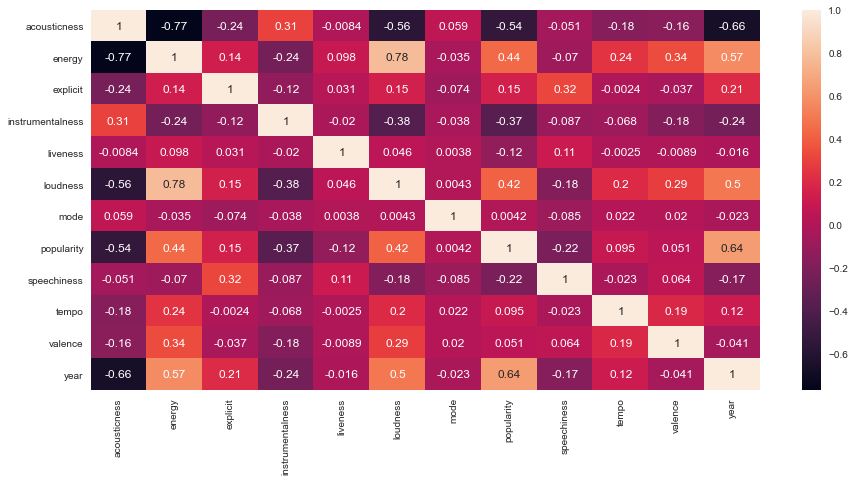

In [33]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    df[[
        'acousticness', 'energy', 'explicit', 'instrumentalness', 
        'liveness', 'loudness', 'mode', 'popularity','speechiness', 
        'tempo', 'valence', 'year'
    ]].corr(), annot=True)

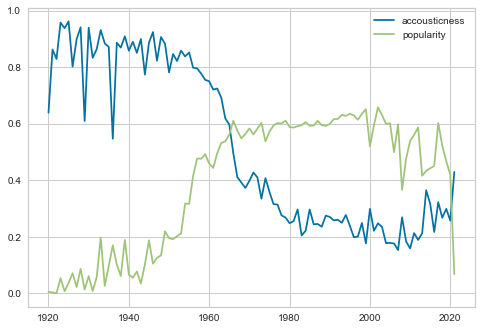

In [34]:
plt.plot(df.groupby(by='year').mean()[['acousticness']])
plt.plot(df.groupby(by='year').mean()[['popularity']]/df.popularity.max())  # scling b/w 0-1
plt.legend(['accousticness', 'popularity'])

In [172]:
# DataFrame for data analysis
da = df.drop(['artists', 'id', 'key', 'name'], axis=1)

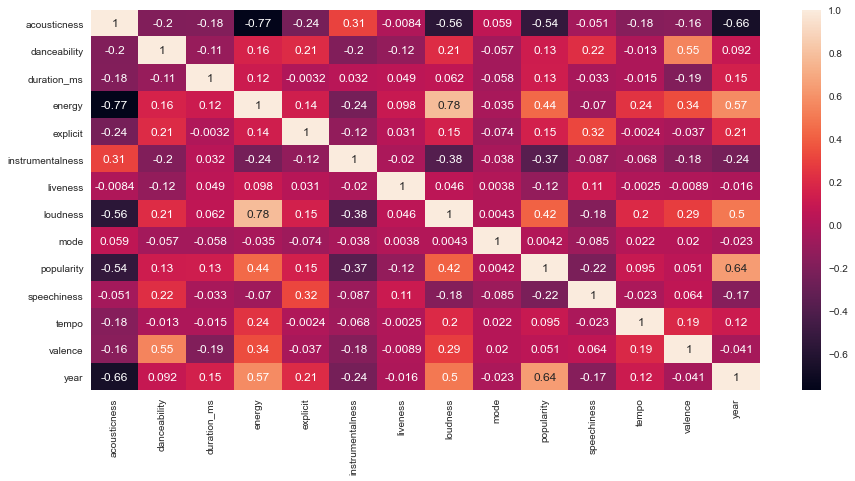

In [36]:
plt.figure(figsize=(15, 7))
sns.heatmap(da.corr(), annot=True)

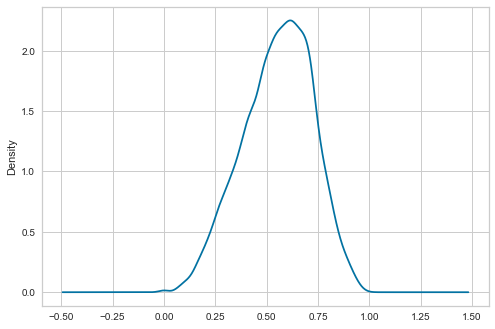

In [37]:
da.danceability.plot.kde()

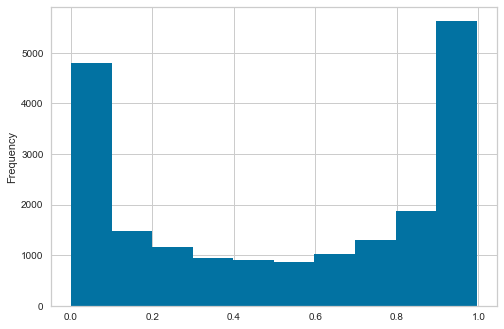

In [38]:
da.acousticness.plot.hist()

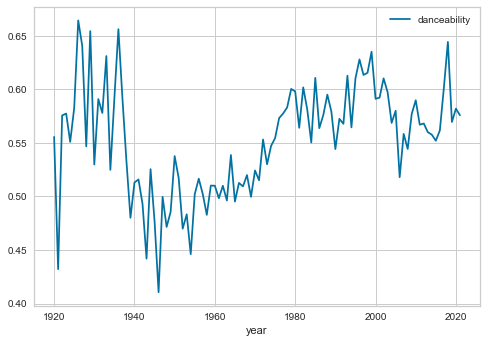

In [39]:
da.groupby('year').mean()[['danceability']].plot.line()

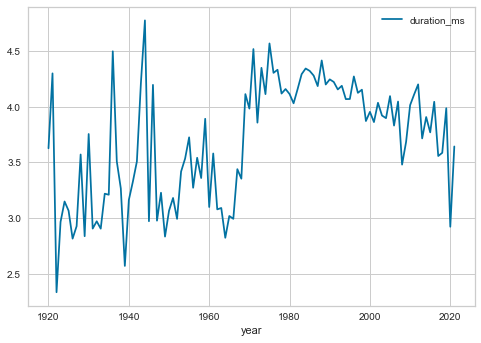

In [40]:
da.groupby('year').mean()[['duration_ms']].plot.line()

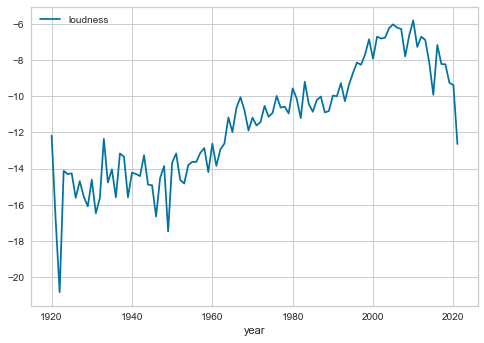

In [41]:
da.groupby('year').mean()[['loudness']].plot.line()

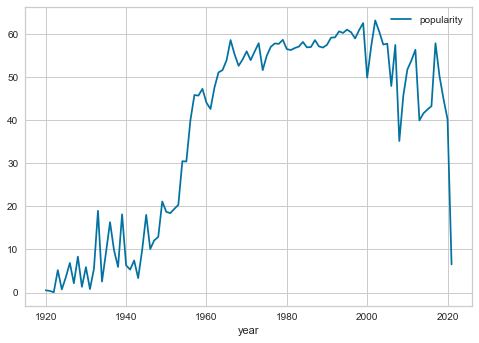

In [42]:
da.groupby('year').mean()[['popularity']].plot.line()

In [43]:
da.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,0.525564,0.552576,3.692118,0.465127,0.071100,0.161390,0.202078,-11.541631,0.719000,37.658950,0.097281,116.676079,0.550017,1970.407750
std,0.381800,0.169744,1.727465,0.263658,0.256998,0.312065,0.168593,5.319268,0.449499,25.940967,0.164314,30.440957,0.254885,29.233344
min,0.000000,0.000000,0.172850,0.000020,0.000000,0.000000,0.000000,-47.046000,0.000000,0.000000,0.000000,0.000000,0.000000,1920.000000
25%,0.112000,0.436000,2.797496,0.244000,0.000000,0.000000,0.098200,-14.452250,0.000000,12.000000,0.034700,93.866500,0.349000,1945.000000
50%,0.579000,0.566000,3.336667,0.438000,0.000000,0.000146,0.136000,-10.860000,1.000000,45.000000,0.044900,114.817500,0.568000,1970.000000
75%,0.921000,0.679000,4.243446,0.681000,0.000000,0.075800,0.258000,-7.599000,1.000000,60.000000,0.073500,133.993250,0.759000,1995.000000
max,0.996000,0.988000,43.221133,1.000000,1.000000,1.000000,0.996000,0.878000,1.000000,96.000000,0.967000,221.741000,0.991000,2021.000000


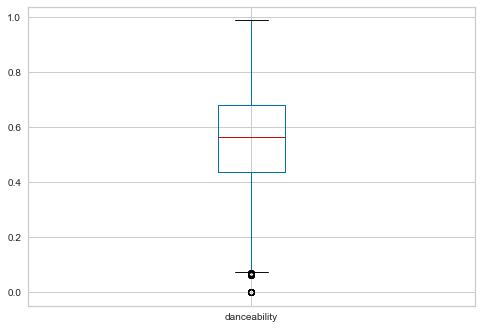

In [44]:
da.danceability.plot.box()

In [45]:
da.acousticness.skew()

-0.1309292976103325

In [150]:
d = {
    'feature':[],
    'skewness':[]
}
def find_skew():
    for i in da.columns:
#         print(f"{i} --> {da[i].skew()}")
        d['feature'].append(i)
        d['skewness'].append(da[i].skew())

find_skew()

In [151]:
s = []

for i in pd.DataFrame(d)['skewness']:
    if -0.5<i<0.5:
        s.append('Symmetrical')
    elif (-1<i<0.5) or (0.5<i<1):
        s.append('Moderately Skewed')
    else:
        s.append('Highly Skewed')

In [152]:
sk = pd.DataFrame(d)
sk['skew'] = s

In [153]:
sk.sort_values(by='skewness')

,feature,skewness,skew
8,mode,-0.974516,Moderately Skewed
7,loudness,-0.927825,Moderately Skewed
2,duration_ms,-0.317286,Symmetrical
1,danceability,-0.290757,Symmetrical
12,valence,-0.200979,Symmetrical
0,acousticness,-0.130929,Symmetrical
9,popularity,-0.117855,Symmetrical
13,year,0.028312,Symmetrical
3,energy,0.216384,Symmetrical
11,tempo,0.491550,Symmetrical


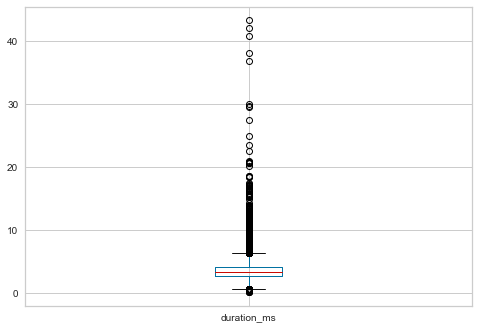

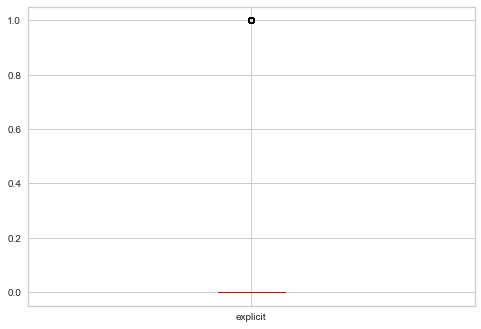

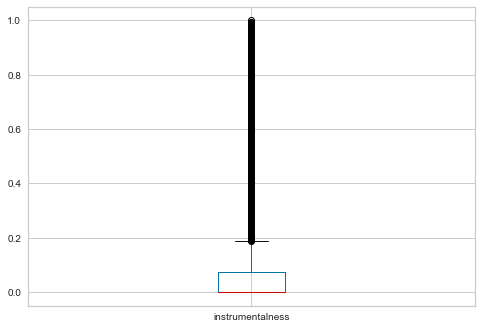

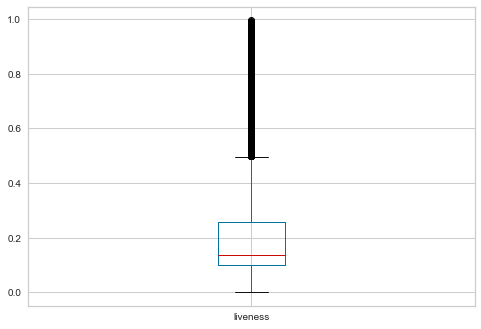

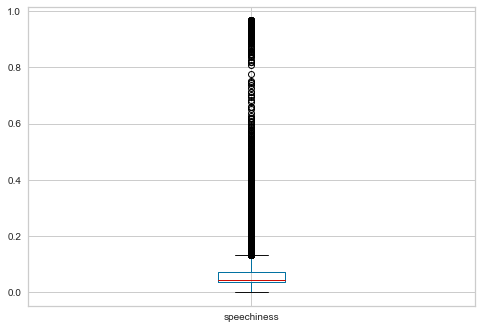

In [50]:
for i in sk[sk['skew']=='Highly Skewed'].feature.values:
    da[i].plot.box()
    plt.show()

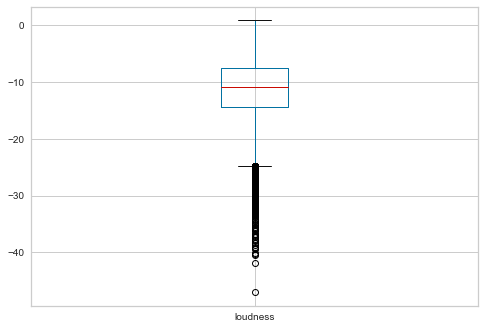

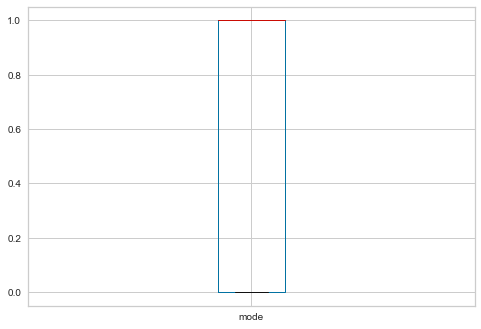

In [51]:
for i in sk[sk['skew']=='Moderately Skewed'].feature.values:
    da[i].plot.box()
    plt.show()

In [52]:
q1 = df.instrumentalness.quantile(0.25)
q3 = df.instrumentalness.quantile(0.75)

iqr = q3-q1
maxi = q3 + 1.5*iqr
mini = q1 - 1.5*iqr

In [53]:
da[da.instrumentalness>maxi]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
3,0.000173,0.730,7.034783,0.798,0,0.801,0.1280,-7.311,1,17,0.0425,127.997,0.0422,1920
5,0.996000,0.424,3.310450,0.245,0,0.799,0.2350,-11.470,1,9,0.0397,103.870,0.4770,1920
8,0.996000,0.469,2.447333,0.238,0,0.960,0.1490,-18.717,1,0,0.0741,130.060,0.6210,1920
9,0.006820,0.571,7.938400,0.753,0,0.873,0.0920,-6.943,1,0,0.0446,126.993,0.1190,1920
11,0.996000,0.579,2.786883,0.356,0,0.948,0.1740,-14.574,1,0,0.0394,131.494,0.7030,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19989,0.000256,0.535,3.499283,0.801,0,0.911,0.3420,-9.713,1,2,0.0414,127.997,0.0328,2021
19993,0.073000,0.606,2.983150,0.915,0,0.247,0.0910,-8.176,0,1,0.0486,128.720,0.2520,2021
19995,0.007210,0.439,3.393533,0.937,0,0.895,0.3300,-10.203,0,0,0.0447,131.992,0.0709,2021
19997,0.003790,0.646,3.445800,0.792,0,0.547,0.2390,-8.355,1,0,0.0358,130.012,0.4270,2021


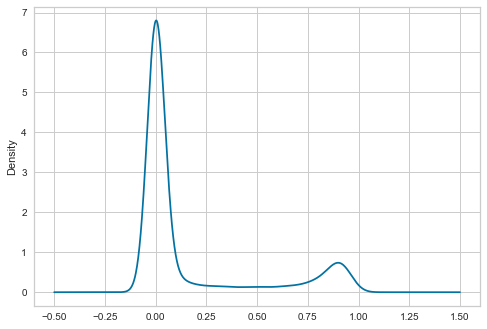

In [54]:
da.instrumentalness.plot.kde()

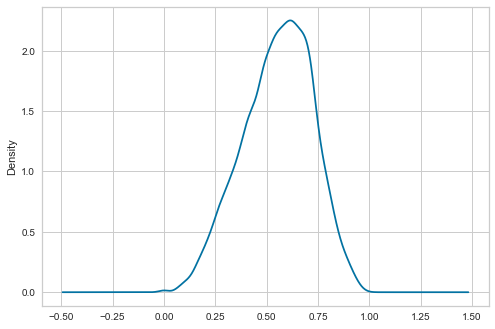

In [55]:
da.danceability.plot.kde()

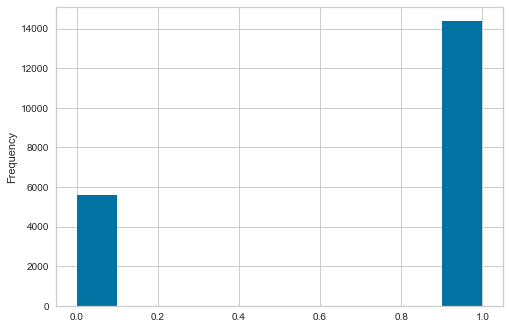

In [56]:
da['mode'].plot.hist()

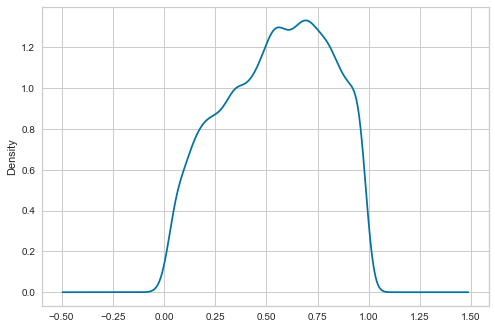

In [57]:
da.valence.plot.kde()

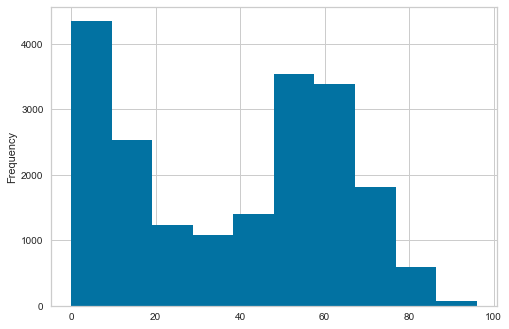

In [58]:
da.popularity.plot.hist()

In [59]:
sum(Counter(da[da.popularity>0.5].year).values())

17644

In [60]:
sum(Counter(da[da.popularity<0.5].year).values())

2356

In [61]:
df.artists.head()

0              ['Mamie Smith']
1    ["Screamin' Jay Hawkins"]
2              ['Mamie Smith']
3          ['Oscar Velazquez']
4                     ['Mixe']
Name: artists, dtype: object

In [62]:
Counter(df.artists).most_common(5)

[("['Francisco Canaro']", 230),
 ("['Ignacio Corsini']", 187),
 ("['The Beatles']", 182),
 ("['Frank Sinatra']", 172),
 ("['Billie Holiday']", 163)]

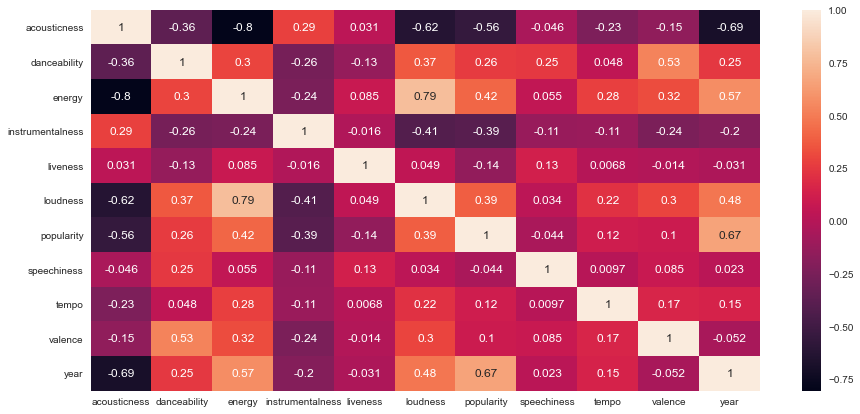

In [63]:
plt.figure(figsize=(15, 7))
sns.heatmap(df.drop(['id', 'key', 'name', 'explicit', 'mode', 'duration_ms'], axis=1).groupby('artists').mean().corr(), annot=True)

In [84]:
sk

,feature,skewness,skew
0,acousticness,-0.130929,Symmetrical
1,danceability,-0.290757,Symmetrical
2,duration_ms,5.302755,Highly Skewed
3,energy,0.216384,Symmetrical
4,explicit,3.338100,Highly Skewed
5,instrumentalness,1.690825,Highly Skewed
6,liveness,2.165806,Highly Skewed
7,loudness,-0.927825,Moderately Skewed
8,mode,-0.974516,Moderately Skewed
9,popularity,-0.117855,Symmetrical


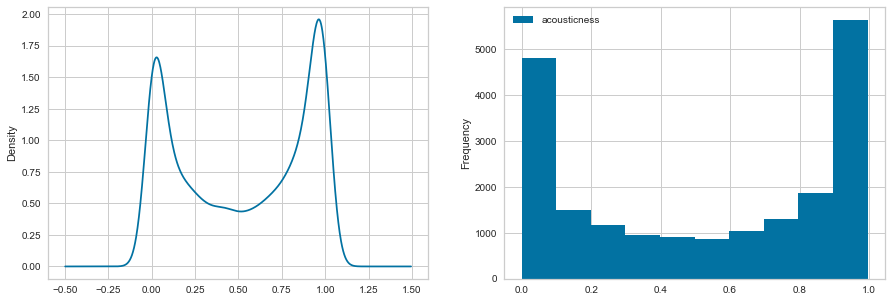

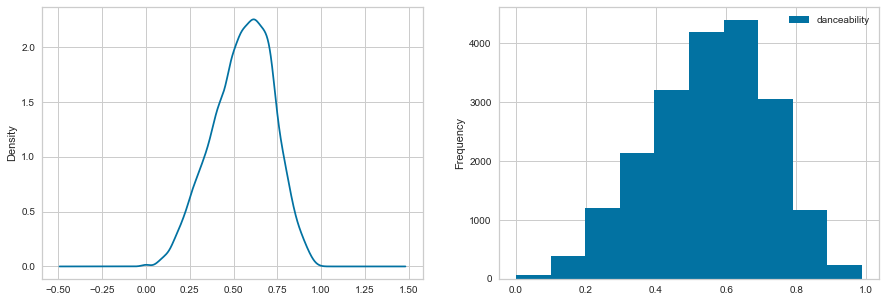

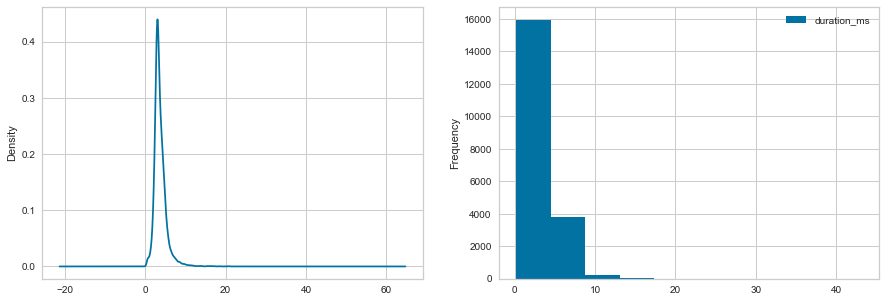

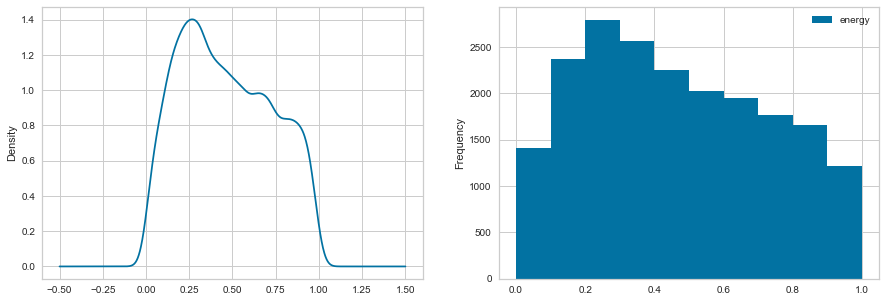

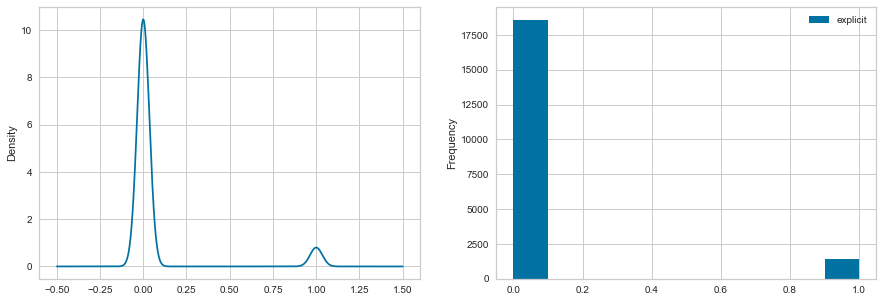

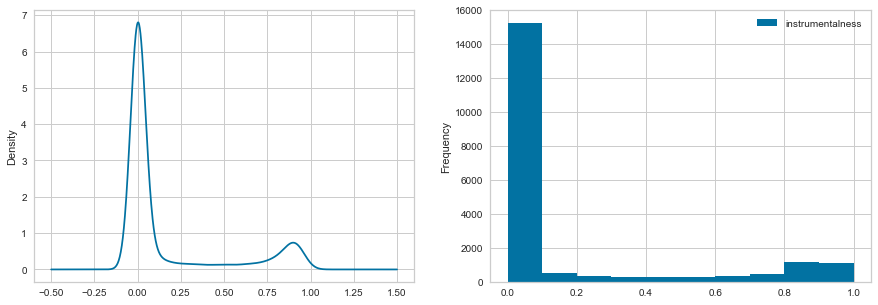

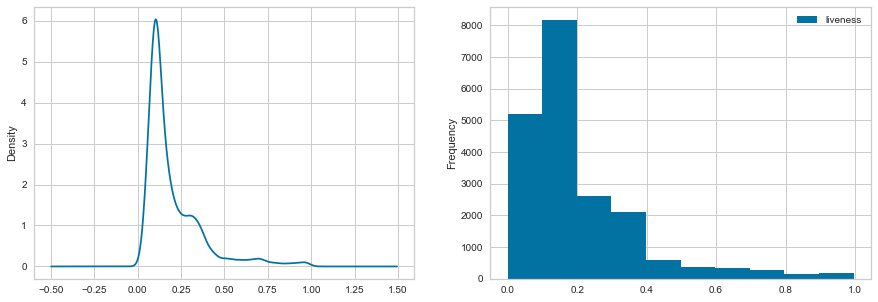

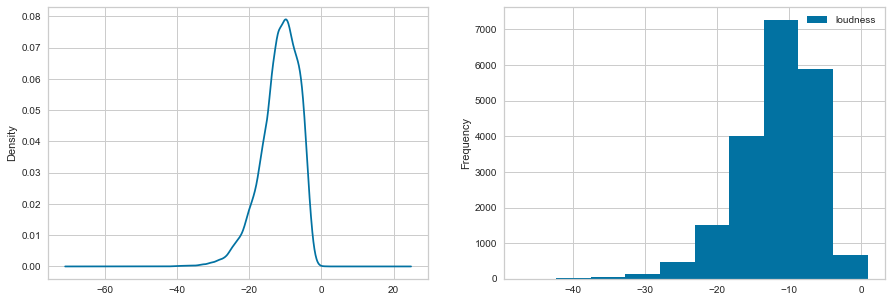

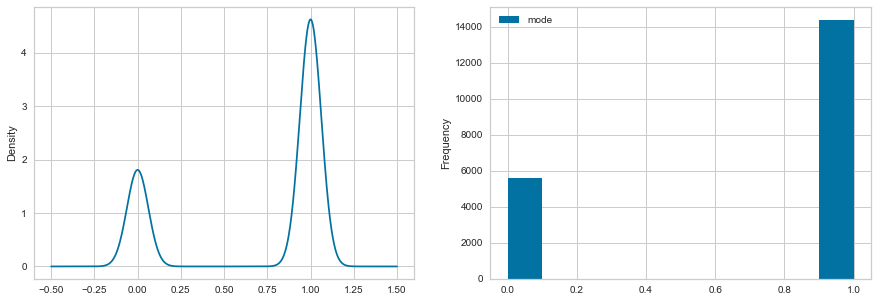

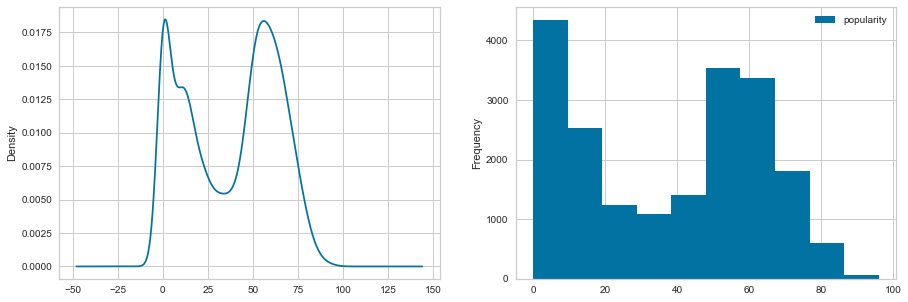

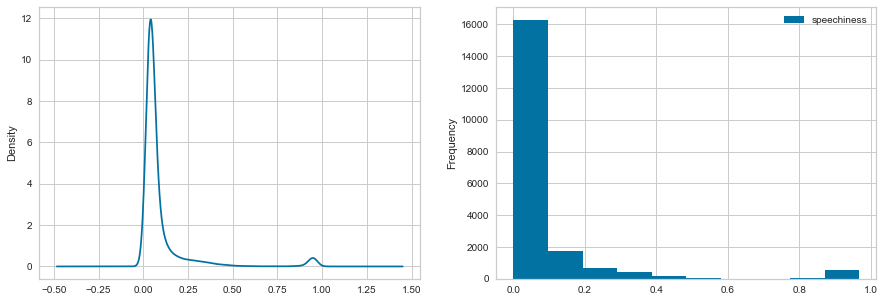

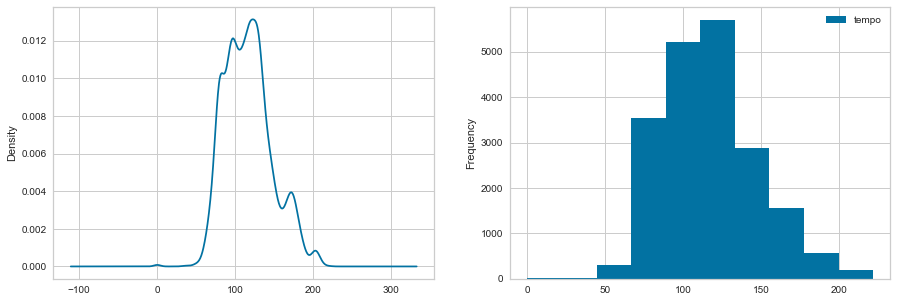

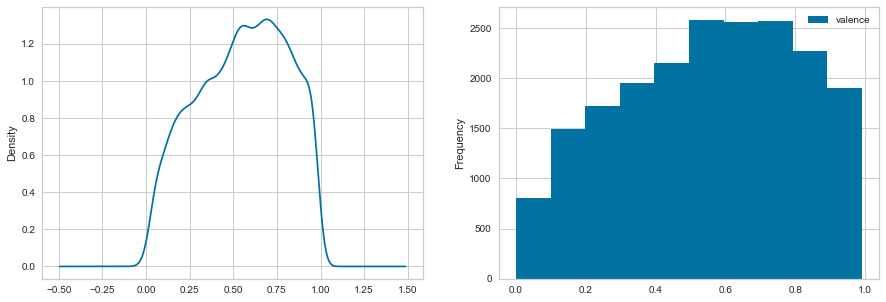

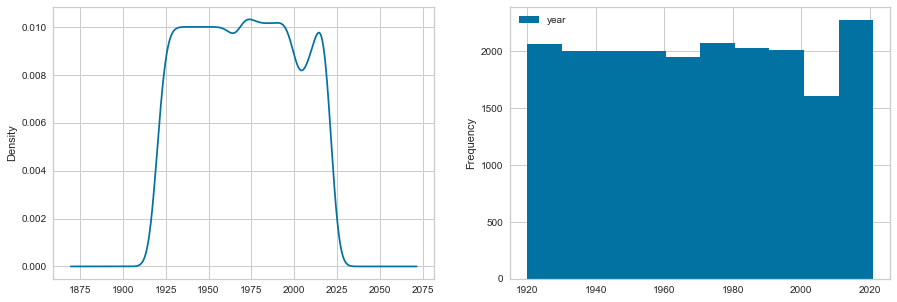

In [104]:
for i in da:
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    da[i].plot.kde()
    plt.subplot(1, 2, 2)
    da[i].plot.hist()
    plt.legend([i])
    plt.show()

In [107]:
da[da.speechiness==0]

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
758,0.99600,0.0,2.232450,0.02580,0,0.768000,0.0831,-24.894,1,0,0.0,0.0,0.0,1924
845,0.99600,0.0,2.837550,0.31500,0,0.956000,0.3750,-15.969,0,0,0.0,0.0,0.0,1924
860,0.99600,0.0,2.150450,0.08290,0,0.893000,0.1230,-24.272,1,0,0.0,0.0,0.0,1924
2820,0.00244,0.0,0.243817,0.80100,0,0.001250,0.0503,-0.671,0,0,0.0,0.0,0.0,1934
3302,0.89000,0.0,2.660000,0.28100,0,0.000000,0.2470,-13.078,1,16,0.0,0.0,0.0,1937
3796,0.97700,0.0,0.545117,0.22300,0,0.010800,0.3370,-19.146,0,13,0.0,0.0,0.0,1939
3806,0.95100,0.0,0.747333,0.13000,0,0.000007,0.7660,-20.510,1,13,0.0,0.0,0.0,1939
4211,0.58300,0.0,0.172850,0.37300,0,0.979000,0.3590,-12.173,1,0,0.0,0.0,0.0,1941
5830,0.98000,0.0,10.584450,0.09470,0,0.778000,0.8610,-16.371,1,13,0.0,0.0,0.0,1949
8758,0.84200,0.0,2.450000,0.40500,0,0.001140,0.1980,-9.935,1,52,0.0,0.0,0.0,1964


# Text Preprocessing

In [64]:
artist = df.artists.str.replace("'", '').str.replace('"', '').str.replace(' ', '')\
        .str.replace('[', '').str.replace(']', '').str.lower().str.split(',')
artist = artist.apply(lambda x: ' '.join(x))
artist

0                     mamiesmith
1             screaminjayhawkins
2                     mamiesmith
3                 oscarvelazquez
4                           mixe
                  ...           
19995    lange andymoor stadium4
19996                   badbunny
19997               above&beyond
19998                shawnmendes
19999                    orkidea
Name: artists, Length: 20000, dtype: object

In [65]:
from sklearn.feature_extraction.text import CountVectorizer

In [66]:
vec = CountVectorizer(stop_words='english')

In [67]:
vectf = vec.fit_transform(artist)

In [68]:
vectf

<20000x6357 sparse matrix of type '<class 'numpy.int64'>'
	with 27025 stored elements in Compressed Sparse Row format>

In [69]:
vec.vocabulary_

{'mamiesmith': 3483,
 'screaminjayhawkins': 4825,
 'oscarvelazquez': 4125,
 'mixe': 3797,
 'herjazzhounds': 2307,
 'franciscocanaro': 1829,
 'meetya': 3671,
 'dorville': 1492,
 'kakoula': 2913,
 'justrock': 2903,
 'takisnikolaou': 5221,
 'aggelikikaragianni': 106,
 'giorgoskatsaros': 2068,
 'amaliavaka': 217,
 'ronvanderkraan': 4680,
 'vasílisbesíristourkovasílis': 6010,
 'tr0ma': 5893,
 'jodoli': 2707,
 'athanasíaalexandropoúlou': 388,
 'dickhaymes': 1365,
 'st': 5048,
 'manoliskarapiperis': 3495,
 'félixmayol': 1921,
 'mauricechevalier': 3633,
 'daviddaniells': 1271,
 'theswinginbachelors': 5727,
 'biex': 557,
 'theharlemtrio': 5486,
 'estherlekain': 1695,
 'brokegod': 757,
 'pcxix': 4239,
 'twocharmingmen': 5943,
 '98': 43,
 'niklaso': 3998,
 'aryiróyiannopoúlou': 370,
 'marikapapagkika': 3540,
 'gustavoobligado': 2184,
 'arielflores': 328,
 'samnacht': 4772,
 'losiento': 3349,
 'mistinguett': 3789,
 'marikaparagkika': 3541,
 'georgel': 1997,
 'ánnakhrisáfi': 6303,
 'konbeatz': 3058

In [214]:
similarity_t = cosine_similarity(vectf, vectf)

MemoryError: Unable to allocate 2.98 GiB for an array with shape (20000, 20000) and data type float64

# Predicting Function

In [207]:
(df.iloc[0])['name']

'Keep A Song In Your Soul'

In [211]:
df[df.index.isin([0,1])]

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
0,0.991,['Mamie Smith'],0.598,2.805550,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.634,1920
1,0.643,"[""Screamin' Jay Hawkins""]",0.852,2.503333,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,0.0534,86.889,0.950,1920


In [228]:
def recommend(similarity, name='Keep A Song In Your Soul'):
    idx = df.loc[df.name==name].index
    print(idx)
    similarity_score = similarity[idx][0]
    similar_music_idx = sorted(enumerate(similarity_score), key=lambda x:x[1], reverse=True)[:11]#[1:11]
    
    similar_music_id = [idx for idx, score in similar_music_idx]
    similar_music_score = [score for idx, score in similar_music_idx]    
    
#     similar_music = [(df.iloc[idx])['name'] for idx, score in similar_music_idx]
#     similar_music_artist = [df.iloc[idx].artists for idx, score in similar_music_idx]
#     similar_music_popularity = [df.iloc[idx].popularity for idx, score in similar_music_idx]    
#     similar_music_year = [df.iloc[idx].year for idx, score in similar_music_idx]    
# #     similar_music_kw = [df.iloc[idx].kw for idx, score in similar_music_idx]
# #     similar_music_pc = [df.iloc[idx].production_companies for idx, score in similar_music_idx]       
#     similar_music_score = [score for idx, score in similar_music_idx]
    
#     return pd.DataFrame({
#         "Music":similar_music,
#         "Artist":similar_music_artist,
#         "Score":similar_music_score,
#         "Popularity":similar_music_popularity,
#         'year':similar_music_year,
# #         'Keyword':similar_music_kw,
# #         "Production Company":similar_music_pc
#     })
    print(similar_music_id)
    temp = df[df.index.isin(similar_music_id)].drop(['id', 'key'], axis=1)
    temp['score'] = similar_music_score
    return temp

# 1. Basic Model on the basis of artist

In [229]:
recommend(similarity_t)

Int64Index([0], dtype='int64')
[0, 2, 6, 142, 173, 5, 7, 40, 42, 56, 59]


,acousticness,artists,danceability,duration_ms,energy,explicit,instrumentalness,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year,score
0,0.991,['Mamie Smith'],0.598,2.805550,0.2240,0,0.000522,0.379,-12.628,0,Keep A Song In Your Soul,12,0.0936,149.976,0.634,1920,1.000000
2,0.993,['Mamie Smith'],0.647,2.730450,0.1860,0,0.000018,0.519,-12.098,1,Golfing Papa,4,0.1740,97.600,0.689,1920,1.000000
5,0.996,['Mamie Smith & Her Jazz Hounds'],0.424,3.310450,0.2450,0,0.799000,0.235,-11.470,1,Crazy Blues - 78rpm Version,9,0.0397,103.870,0.477,1920,1.000000
6,0.992,['Mamie Smith'],0.782,3.253333,0.0573,0,0.000002,0.176,-12.453,1,Don't You Advertise Your Man,5,0.0592,85.652,0.487,1920,1.000000
7,0.996,['Mamie Smith & Her Jazz Hounds'],0.474,3.102883,0.2390,0,0.186000,0.195,-9.712,1,Arkansas Blues,0,0.0289,78.784,0.366,1920,1.000000
40,0.995,"['Mamie Smith', 'The Harlem Trio']",0.482,3.300000,0.2290,0,0.000061,0.549,-12.619,1,Kansas City Man Blues - 78rpm Version,4,0.0812,77.232,0.461,1920,0.707107
42,0.995,['Mamie Smith & Her Jazz Hounds'],0.534,2.939333,0.1910,0,0.098200,0.805,-12.889,0,Mean Man,0,0.0508,70.059,0.605,1920,0.707107
56,0.996,['Mamie Smith & Her Jazz Hounds'],0.575,2.952883,0.2470,0,0.068400,0.362,-13.284,0,Frankie Blues,0,0.0400,130.804,0.841,1920,0.707107
59,0.996,['Mamie Smith & Her Jazz Hounds'],0.679,2.920000,0.1820,0,0.668000,0.470,-13.741,1,The Darktown Flappers' Ball,0,0.0693,123.803,0.754,1920,0.707107
142,0.992,['Mamie Smith'],0.574,3.163333,0.1380,0,0.000492,0.233,-14.171,1,Miss Jenny's Ball (aka There'll Be No Freebies...,1,0.1090,158.422,0.764,1920,0.707107


# 2. Adding Numerical features to Text without scaling

In [170]:
vectf

<20000x6357 sparse matrix of type '<class 'numpy.int64'>'
	with 27025 stored elements in Compressed Sparse Row format>

In [173]:
feat = hstack([vectf, csr_matrix(da.values)])
feat

<20000x6371 sparse matrix of type '<class 'numpy.float64'>'
	with 274717 stored elements in COOrdinate format>

In [174]:
similarity_twos = cosine_similarity(feat, feat)

In [203]:
recommend(similarity_twos)

Int64Index([0], dtype='int64')


,Music,Artist,Score,Popularity,year
0,Keep A Song In Your Soul,['Mamie Smith'],1.000000,12,1920
1,Rock-Skippin' at the Blue Note,['Duke Ellington'],0.999999,12,1951
2,For No Reason at All In C,"['Frankie Trumbauer', 'Bix Beiderbecke', 'Eddi...",0.999999,12,1927
3,(Why Did I Tell You I Was Going To) Shanghai,['Doris Day'],0.999999,14,1945
4,2021,['Yunginky'],0.999999,14,2020
5,It's Mighty Dark to Travel,['Bill Monroe & His Blue Grass Boys'],0.999999,11,1945
6,I Got Rhythm - Live,['Benny Goodman'],0.999998,12,1938
7,De Kalb Blues,['Lead Belly'],0.999998,13,1939
8,"John, I'm Only Dancing - Sax Version; 2012 Rem...",['David Bowie'],0.999998,14,2015
9,Strike Up The Band,['Marian McPartland'],0.999998,12,1953


# 3. Adding Numerical features to Text with scaling

In [ ]:
dts = da.copy()

In [166]:
stdscl = StandardScaler()
minmax = MinMaxScaler()
robust = RobustScaler()

# dancescl = stdscl.fit_transform(dts.danceability)
# energyscl = stdscl.fit_transform(dts.energy)
# loudscl = stdscl.fit_transform(dts.loudness)
# popularityscl = minmax.fit_transform(dts.popularity)
# speechscl = robust.fit_transform(dts.speechiness)
# temposcl = minmax.fit_transform(dts.tempo)
# valencescl = stdscl.fit_transform(dts.valence)

dts.danceability = stdscl.fit_transform(dts.danceability.values.reshape(-1, 1))
dts.energy = stdscl.fit_transform(dts.energy.values.reshape(-1, 1))
dts.loudness = stdscl.fit_transform(dts.loudness.values.reshape(-1, 1))
dts.popularity = minmax.fit_transform(dts.popularity.values.reshape(-1, 1))
dts.speechiness = robust.fit_transform(dts.speechiness.values.reshape(-1, 1))
dts.tempo = minmax.fit_transform(dts.tempo.values.reshape(-1, 1))
dts.valence = stdscl.fit_transform(dts.valence.values.reshape(-1, 1))

dts.duration_ms = np.log(dts.duration_ms)

In [167]:
feat = hstack([vectf, csr_matrix(dts.values)])
feat

<20000x6371 sparse matrix of type '<class 'numpy.float64'>'
	with 274728 stored elements in COOrdinate format>

In [168]:
similarity_tws = cosine_similarity(feat, feat)

In [204]:
recommend(similarity_tws)

NameError: name 'similarity_tws' is not defined

In [230]:
df.sort_values(by='popularity', ascending=False)

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,speechiness,tempo,valence,year
19862,0.221,"['24kGoldn', 'iann dior']",0.700,2.342100,0.7220,1,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,Mood (feat. iann dior),96,0.0369,90.989,0.756,2020
19866,0.468,['Ariana Grande'],0.737,2.872083,0.8020,1,35mvY5S1H3J2QZyna3TFe0,0.000000,0,0.0931,-4.771,1,positions,96,0.0878,144.015,0.682,2020
19976,0.212,['KAROL G'],0.863,2.982450,0.6660,1,7vrJn5hDSXRmdXoR30KgF1,0.000493,1,0.1030,-4.158,0,BICHOTA,95,0.1520,163.908,0.838,2020
19886,0.401,"['Bad Bunny', 'Jhay Cortez']",0.731,3.418167,0.5730,1,47EiUVwUp4C9fGccaPuUCS,0.000052,4,0.1130,-10.059,0,DÁKITI,95,0.0544,109.928,0.145,2020
19868,0.237,['Ariana Grande'],0.830,2.895183,0.5850,1,6Im9k8u9iIzKMrmV7BWtlF,0.000000,0,0.2480,-6.476,1,34+35,94,0.0940,109.978,0.485,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2084,0.971,"['Ninon Vallin', 'Georges Thill', 'Germaine Fé...",0.310,2.821783,0.0823,0,02qq0HPWQN106kaH2dReui,0.000008,9,0.3070,-17.227,1,"Werther, Acte III: Ah! Le rire est béni",0,0.0599,76.193,0.148,1931
2083,0.994,['Angurbala Devi'],0.286,3.487783,0.1860,0,02UxgLiaCtkzZRCNx0flog,0.923000,10,0.1460,-16.471,0,Aasile E Bhanga Ghare,0,0.0386,74.248,0.199,1931
4809,0.900,['Tara'],0.440,3.394750,0.1610,0,0DhuTDUirJ1PgIz8LE5R6g,0.000000,11,0.3600,-19.553,1,Ankhon Mein Ankhen,0,0.1030,137.159,0.414,1944
2082,0.747,['Эрих Мария Ремарк'],0.621,2.145000,0.2620,1,01haF1dSEfJkFERIuHRk13,0.000000,3,0.1590,-17.019,0,Часть 46.2 - Обратный путь,0,0.9670,75.064,0.508,1931
